In [1]:
import pandas as pd
import numpy as np
import networkx as nx

n_embeddings=128
n_clusters=10
LINE_embeddings = pd.read_csv(
    f"embeddings/LINE_embeddings.tsv", sep="\t", index_col=0
)
deepwalk_embeddings = pd.read_csv(
    "embeddings/node2vec_embeddings.tsv", sep="\t", index_col=0
)
itemwalk_embeddings_double = pd.read_csv(
    "embeddings/itemwalk_embeddings_double.tsv", sep="\t", index_col=0
)
itemwalk_embeddings_single = pd.read_csv(
    "embeddings/itemwalk_embeddings_single.tsv", sep="\t", index_col=0
)

bidder_mapping = pd.read_csv("assets/bidder_mapping.csv", index_col=0)
buyer_mapping = pd.read_csv("assets/buyer_mapping.csv", index_col=0)

/tmp/ipykernel_287093/356820416.py:7: DtypeWarning: Columns (260) have mixed types. Specify dtype option on import or set low_memory=False.
  LINE_embeddings = pd.read_csv(
/tmp/ipykernel_287093/356820416.py:13: DtypeWarning: Columns (258,260,261) have mixed types. Specify dtype option on import or set low_memory=False.
  itemwalk_embeddings_double = pd.read_csv(
/tmp/ipykernel_287093/356820416.py:16: DtypeWarning: Columns (130,132,133) have mixed types. Specify dtype option on import or set low_memory=False.
  itemwalk_embeddings_single = pd.read_csv(


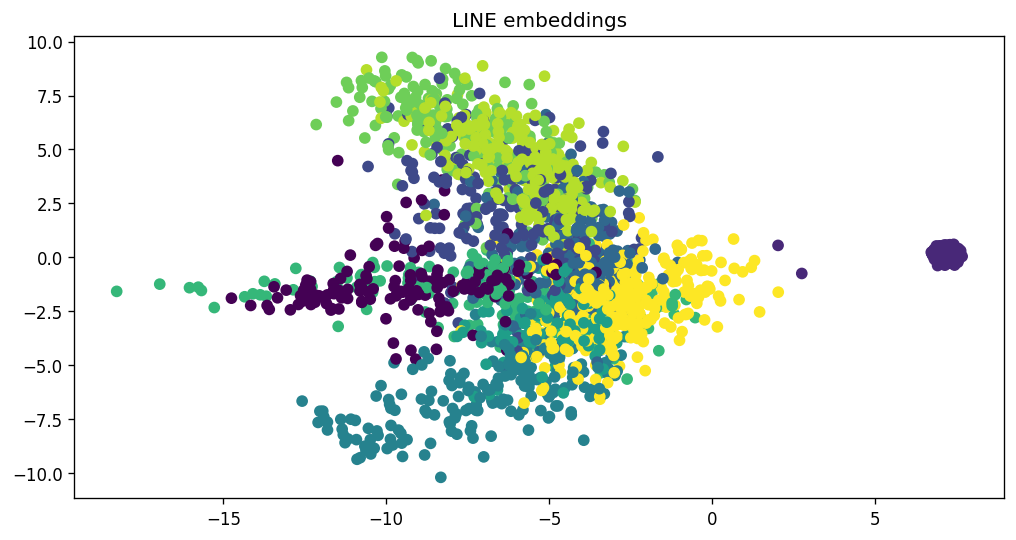

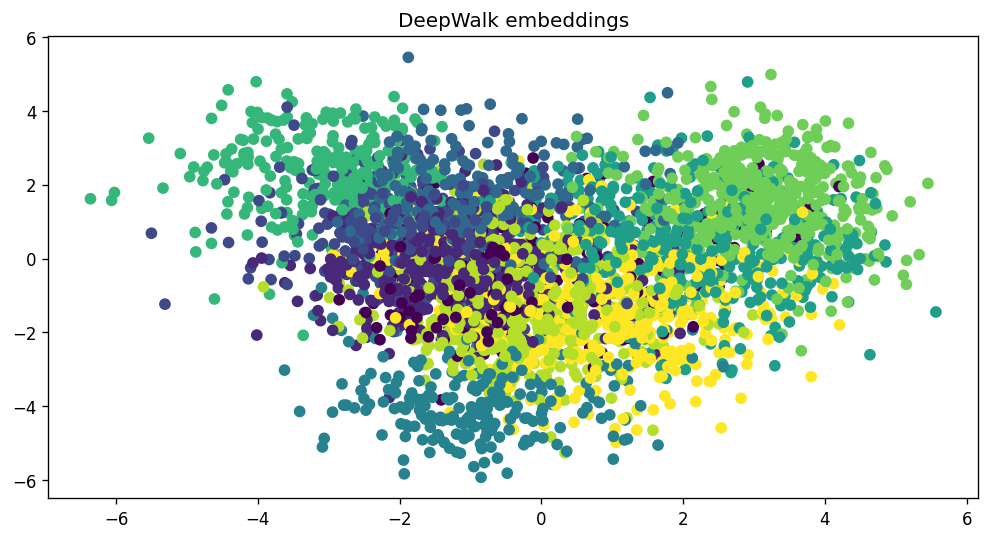

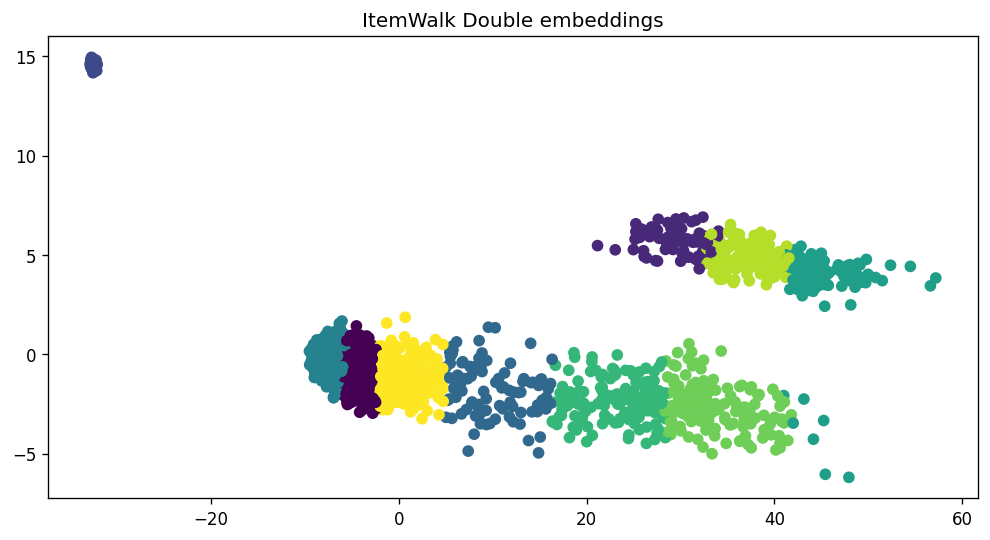

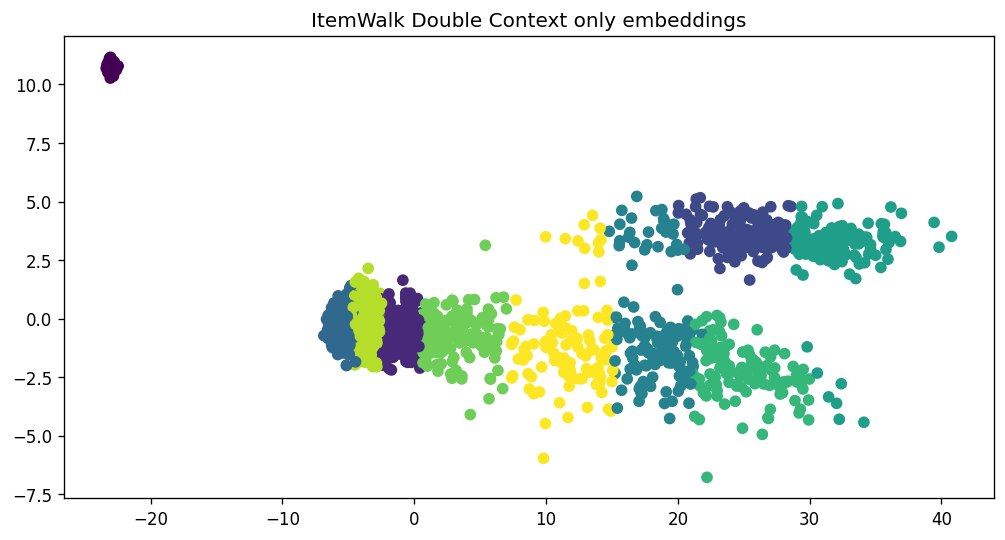

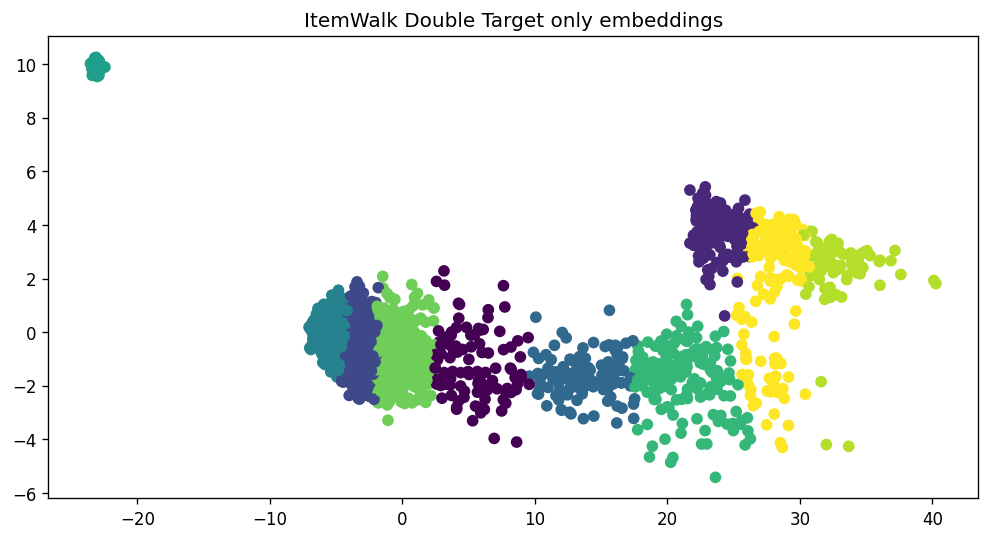

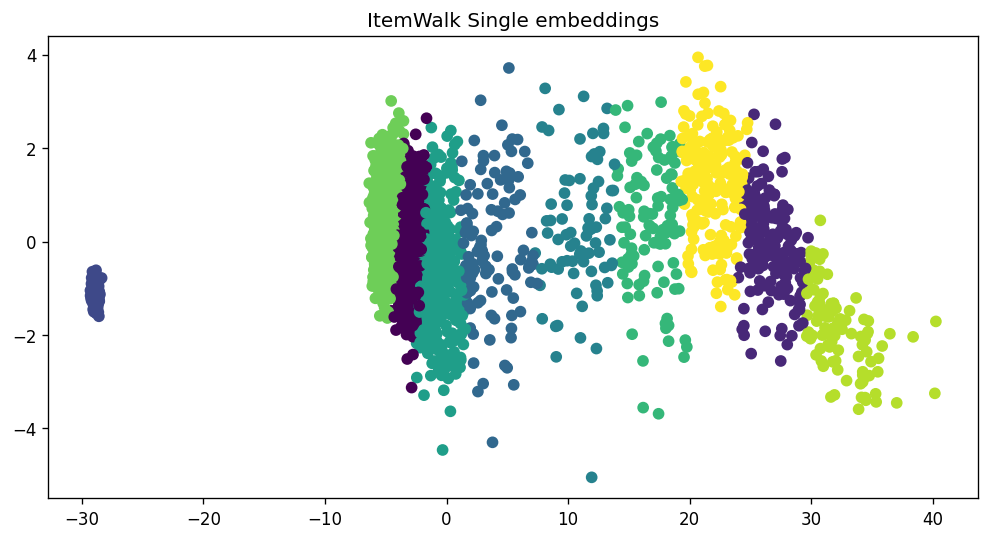

In [2]:
# perform PCA on embeddings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

n_clusters=10

for (name, embeddings, n_embeddings) in [
    ("LINE", LINE_embeddings, 128),
    ("DeepWalk", deepwalk_embeddings, 128),
    ("ItemWalk Double", itemwalk_embeddings_double, 256),
    ("ItemWalk Double Context only", itemwalk_embeddings_double.iloc[:, :128], 128),
    ("ItemWalk Double Target only", itemwalk_embeddings_double.iloc[:, 128:256], 128),
    ("ItemWalk Single", itemwalk_embeddings_single, 128),
]:
    standardized_embeddings = StandardScaler().fit_transform(
        embeddings.values[:, : n_embeddings]
    )
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(
        standardized_embeddings
    )

    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(standardized_embeddings)

    # visualize embeddings
    plt.figure(figsize=(10, 5), dpi=120)
    plt.scatter(
        pca_embeddings[:, 0], pca_embeddings[:, 1], c=kmeans.labels_, cmap="viridis"
    )
    plt.title(f"{name} embeddings")
    plt.show()

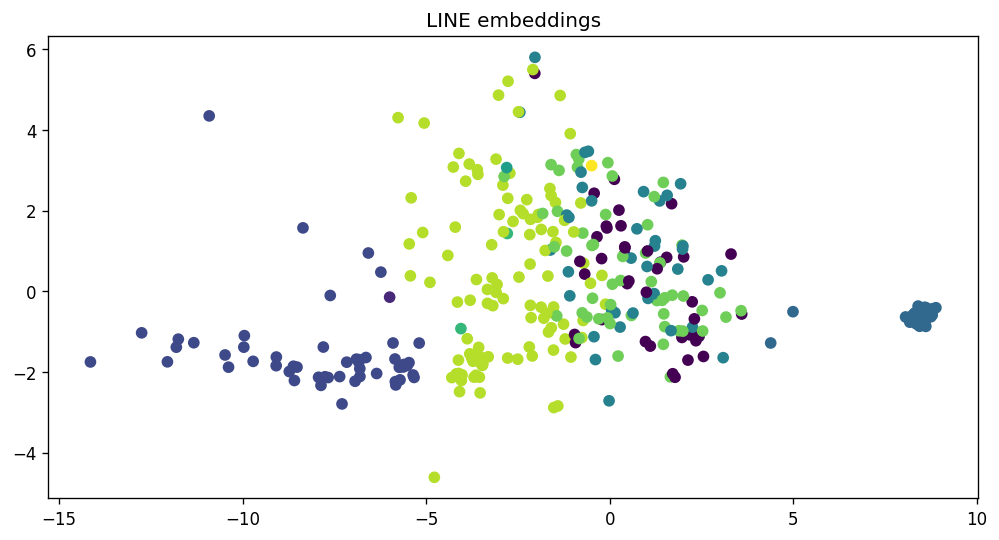

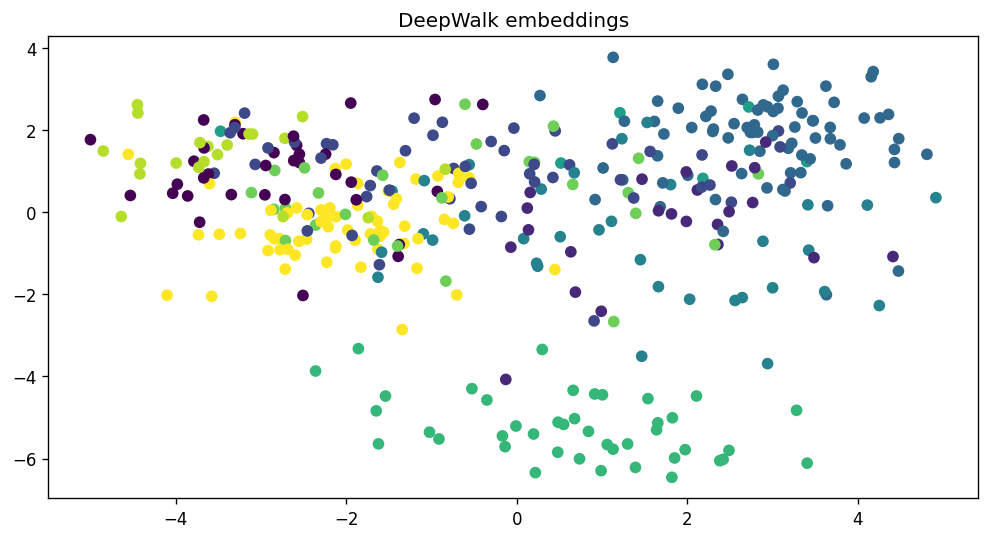

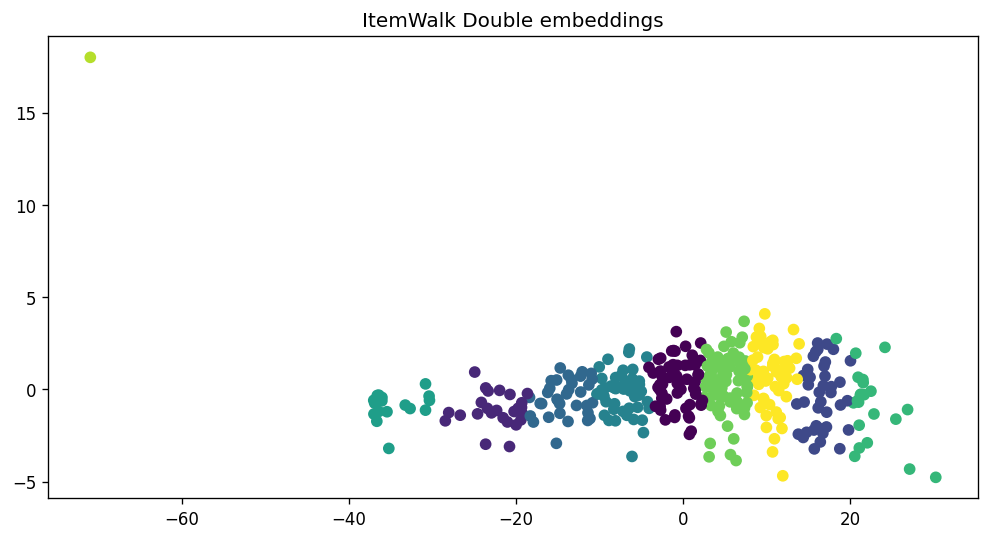

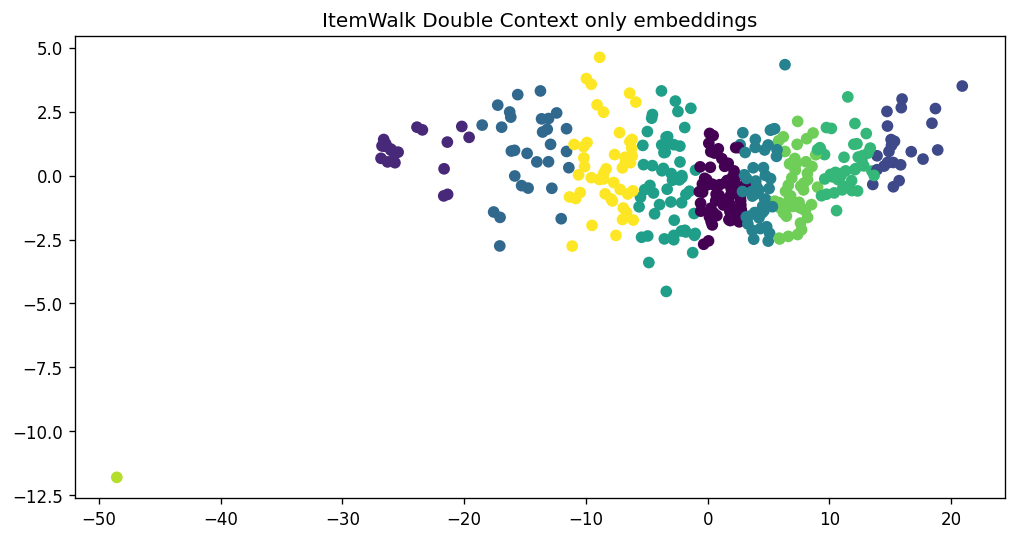

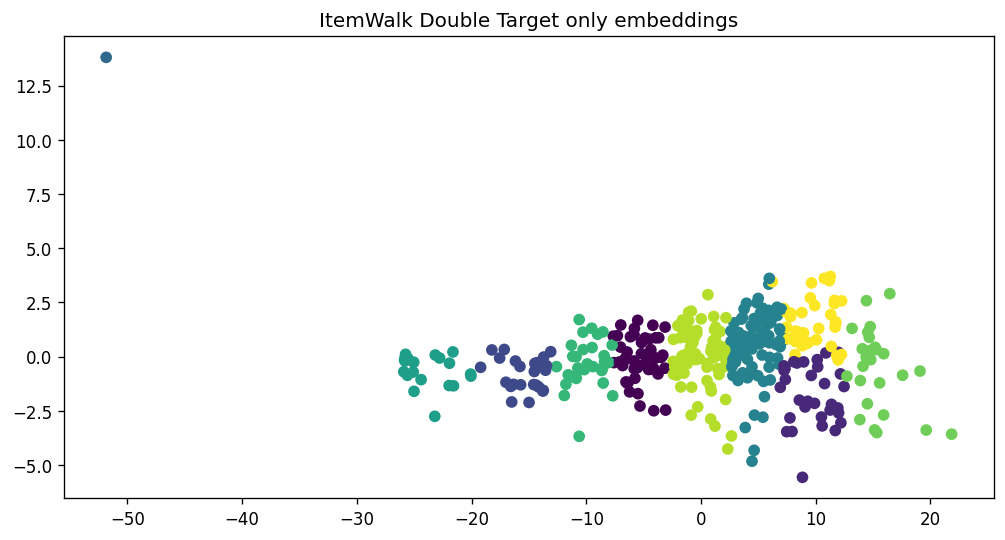

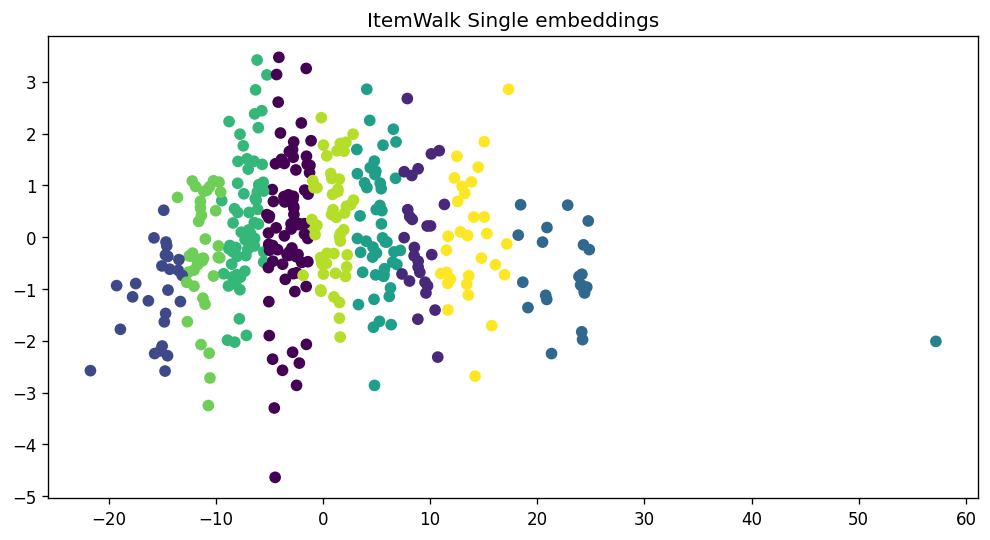

In [3]:
# visualize only buyer embeddings
for (name, embeddings, n_embeddings) in [
    ("LINE", LINE_embeddings, 128),
    ("DeepWalk", deepwalk_embeddings, 128),
    ("ItemWalk Double", itemwalk_embeddings_double, 256),
    ("ItemWalk Double Context only", itemwalk_embeddings_double.iloc[:, :128], 128),
    ("ItemWalk Double Target only", itemwalk_embeddings_double.iloc[:, 128:256], 128),
    ("ItemWalk Single", itemwalk_embeddings_single, 128),
]:
    buyer_idx = [i for i in buyer_mapping.index.values if i in embeddings.index.values]
    embeddings = embeddings.loc[buyer_idx].values

    standardized_embeddings = StandardScaler().fit_transform(
        embeddings[:, : n_embeddings]
    )
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(
        standardized_embeddings
    )

    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(standardized_embeddings)

    # visualize embeddings
    plt.figure(figsize=(10, 5), dpi=120)
    plt.scatter(
        pca_embeddings[:, 0], pca_embeddings[:, 1], c=kmeans.labels_, cmap="viridis"
    )
    plt.title(f"{name} embeddings")
    plt.show()

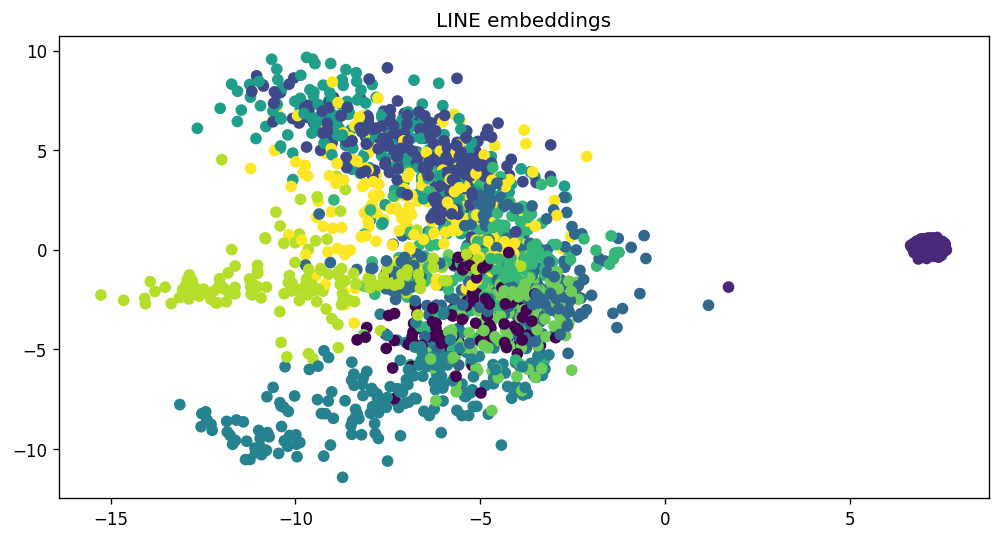

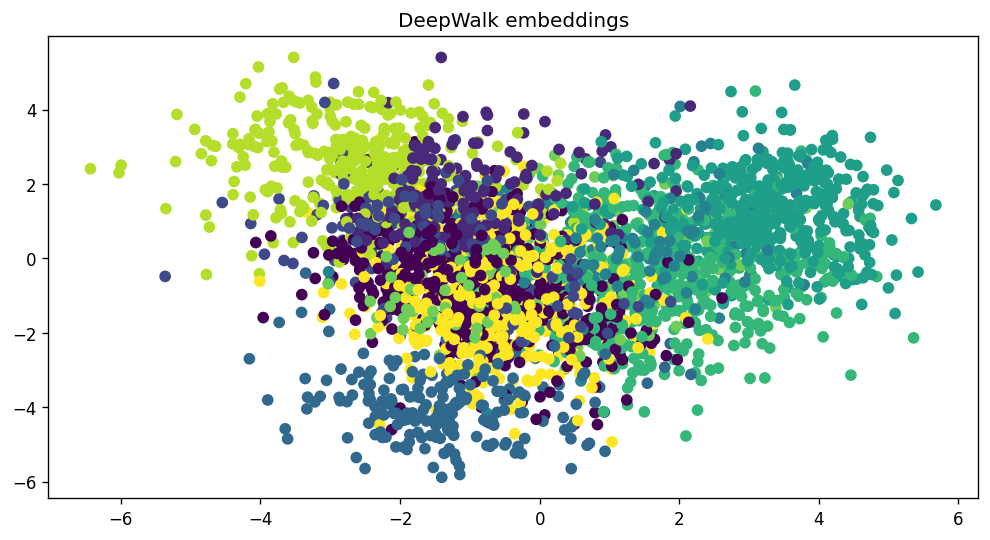

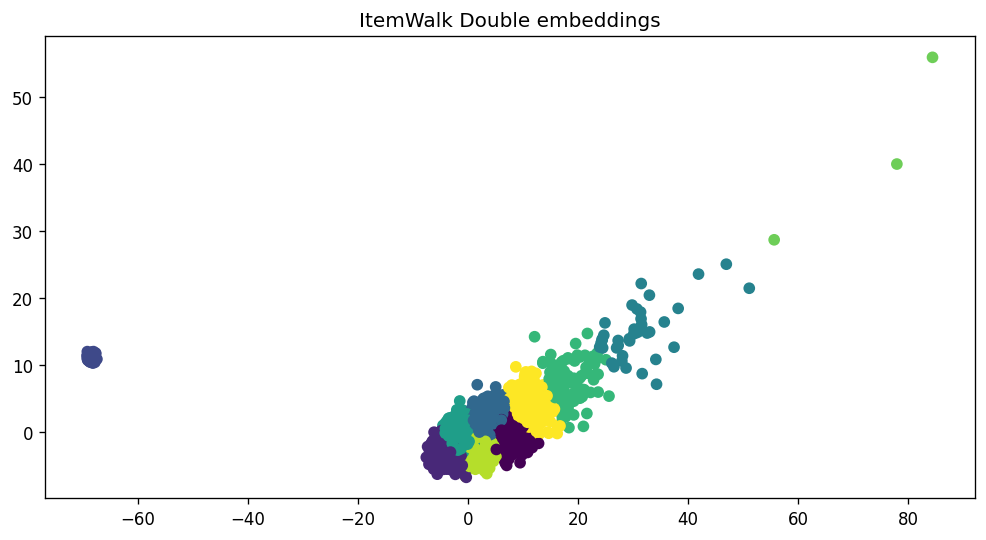

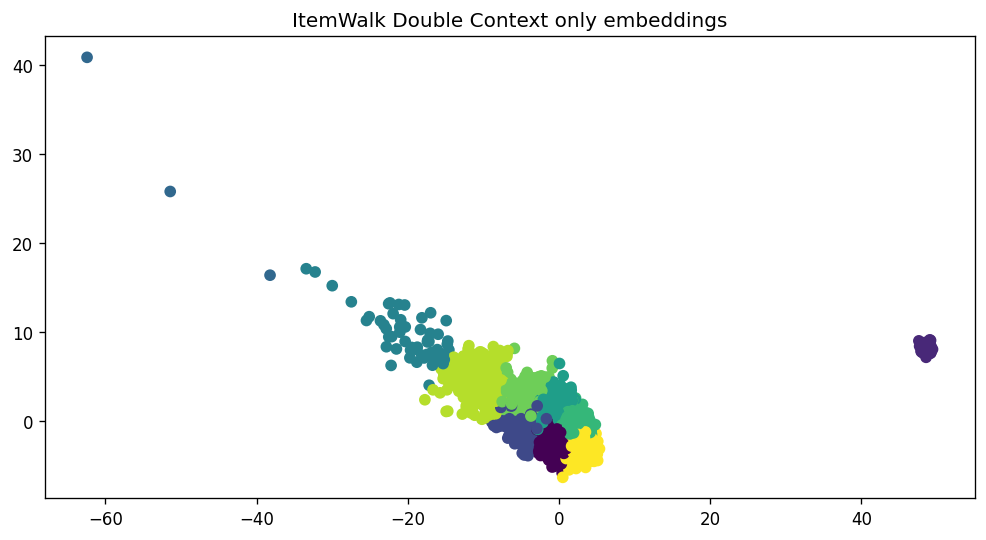

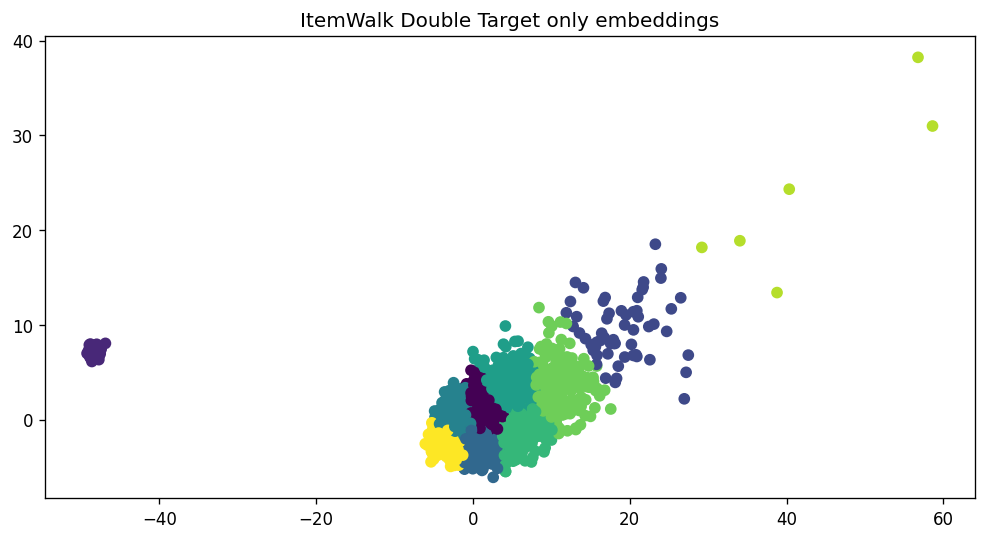

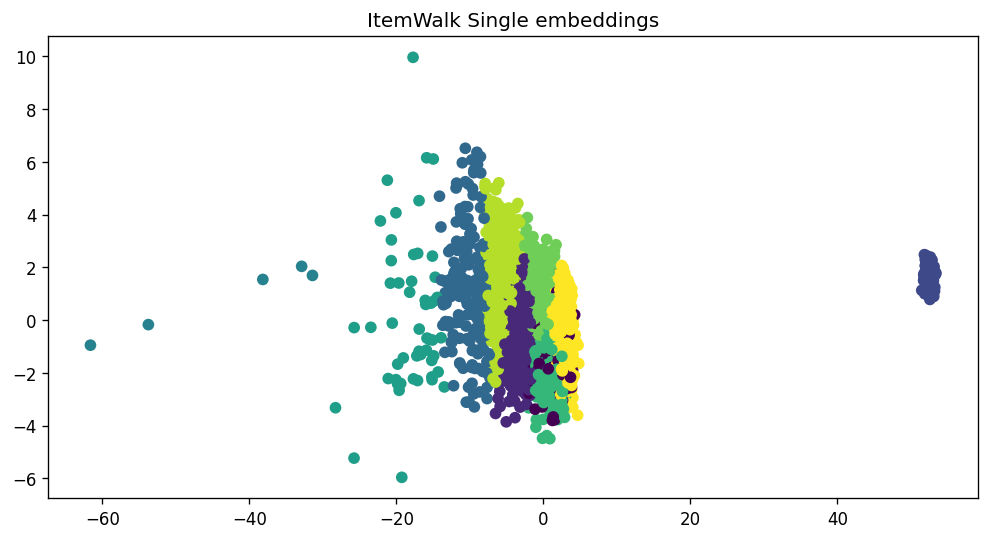

In [4]:
# visualize only supplier embeddings
for (name, embeddings, n_embeddings) in [
    ("LINE", LINE_embeddings, 128),
    ("DeepWalk", deepwalk_embeddings, 128),
    ("ItemWalk Double", itemwalk_embeddings_double, 256),
    ("ItemWalk Double Context only", itemwalk_embeddings_double.iloc[:, :128], 128),
    ("ItemWalk Double Target only", itemwalk_embeddings_double.iloc[:, 128:256], 128),
    ("ItemWalk Single", itemwalk_embeddings_single, 128),
]:
    bidder_idx = [i for i in bidder_mapping.index.values if i in embeddings.index.values]
    embeddings = embeddings.loc[bidder_idx].values

    standardized_embeddings = StandardScaler().fit_transform(
        embeddings[:, : n_embeddings]
    )
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(
        standardized_embeddings
    )

    pca = PCA(n_components=2)
    pca_embeddings = pca.fit_transform(standardized_embeddings)

    # visualize embeddings
    plt.figure(figsize=(10, 5), dpi=120)
    plt.scatter(
        pca_embeddings[:, 0], pca_embeddings[:, 1], c=kmeans.labels_, cmap="viridis"
    )
    plt.title(f"{name} embeddings")
    plt.show()

In [5]:
def show_embedding_clusters(embeddings, n_embeddings, n_clusters):
    standardized_embeddings = StandardScaler().fit_transform(
        embeddings.values[:, : n_embeddings]
    )
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(
        standardized_embeddings
    )
    labels = kmeans.labels_
    for i in range(n_clusters):
        print(f"Cluster {i}:")
        print(embeddings.loc[labels == i, "uge_translated"].to_numpy())

In [6]:
deepwalk_embeddings_buyers = deepwalk_embeddings.loc[[idx for idx in buyer_mapping.index if idx in deepwalk_embeddings.index]]
deepwalk_embeddings_bidders = deepwalk_embeddings.loc[[idx for idx in bidder_mapping.index if idx in deepwalk_embeddings.index]]

LINE_embeddings_buyers = LINE_embeddings.loc[[idx for idx in buyer_mapping.index if idx in LINE_embeddings.index]]
LINE_embeddings_bidders = LINE_embeddings.loc[[idx for idx in bidder_mapping.index if idx in LINE_embeddings.index]]

itemwalk_embeddings_double_buyers = itemwalk_embeddings_double.loc[[idx for idx in buyer_mapping.index if idx in itemwalk_embeddings_double.index]]
itemwalk_embeddings_double_bidders = itemwalk_embeddings_double.loc[[idx for idx in bidder_mapping.index if idx in itemwalk_embeddings_double.index]]

itemwalk_embeddings_single_buyers = itemwalk_embeddings_single.loc[[idx for idx in buyer_mapping.index if idx in itemwalk_embeddings_single.index]]
itemwalk_embeddings_single_bidders = itemwalk_embeddings_single.loc[[idx for idx in bidder_mapping.index if idx in itemwalk_embeddings_single.index]]

In [72]:
show_embedding_clusters(deepwalk_embeddings_buyers, 128, 7)

Cluster 0:
['COORD. INFRASTRUCTURE AND SCHOOL SERVICES'
 'CTO. EST. EDUCATION TECHNOLOGY. PAULA SOUZA - CEETEP'
 'CTO.PROGR.PEN."DR.JAVERT DE ANDRADE" SJRP.'
 'PENIT. DR. DANILO PINHEIRO - SOROCABA'
 'PENIT. DR.ANTONIO Q.SON OF ITIRAPINA'
 'PENIT.DR.SEBASTIAO MARTINS SILVEIRA'
 'PENIT. P.PRUDENTE WELLINGTON R.SEGURA' 'PENIT. II OF SAO VICENTE'
 'PENIT. DR.ANTONIO SOUZA NETO DE SOROCABA'
 'CTRO.PROGR. PENINT. DR. MARINA M.C. OLIVEIR'
 'CPP. DR.ALBERTO BROCCHIERI DE BAURU'
 'PENIT. JAIRO ALMEIDA BUENO DE ITAPETININGA'
 'PENIT."ASP MARIA F.DE SOUSA DIAS-ITAPETINING'
 'PENIT. ASP LINDOLFO T. FILHO, MIRANDOPOLIS' 'CPP. FROM HORTOLANDIA'
 'PENIT. ODETE L. CAMPOS CRITTER'
 'C.P.P. PROF.ATALIBA NOGUEIRA - CAMPINAS'
 'ADRIANO MARREY DE GUARULHOS PENITENTIAL'
 'PENIT. VALENTIM ALVES DA SILVA'
 'PENIT.JOAQUIM DE SYLOS CINTRA, FROM CASA BRANC'
 'PENIT. ORLANDO BRANDO FILINTO' 'PENIT. ODON RAMOS MARANHAO DE IPERO'
 'PENIT. JOAO BATISTA A. SAMPAIO'
 'PENIT."AEVP JAIR GUIMARAES DE LIMA" DE POTIM' 'PO

In [71]:
show_embedding_clusters(LINE_embeddings_buyers, 128, 7)

Cluster 0:
['DIR.ENS.-REG.NORTE 2' 'DIR.ENS.-REG.SUL 1' 'DIR.ENS.-EG.SUL 2'
 'DIR.ENS.-REG.CARAPICUIBA' 'DIR.ENS.-REG.DIADEMA'
 'DIR.ENS.-REG.MOGI DAS CRUZES' 'DIR.ENS.-REG.BOTUCATU'
 'DIR.ENS.-REG.FERNANDOPOLIS' 'DIR.ENS.-REG.LINS' 'DIR.ENS.-REG.MIRACATU'
 'DIR.ENS.-REG.SAO JOSE DOS CAMPOS' 'DIR.ENS.-REG.TAUBATE'
 'DIR.ENS.-REG.PENAPOLIS' 'DEPTO.REG.HEALTH - DRS-VII CAMPINAS'
 'DEPT.REG.HEALTH OF TAUBATE - DRS-XVII'
 'DEPTO.REG.HEALTH - DRS-XII REGISTRATION'
 'DEPTO.REG.HEALTH - DRS-IV BAIXADA SANTISTA'
 'INST. EMILIO RIBAS INFECTOLOGY'
 'USP-FACULDADE DE FILOS.CIEN.LETRAS RIB.PRETO'
 'CAMPINAS STATE UNIVERSITY'
 'UNESP-GENERAL ADMINISTRATION-BOTUCATU CAMPUS'
 'UNESP-INST.GEOCIEN.E CIEN.EXATAS-C.RIO CLARO'
 'UNESP-INST.BIOCIEN.,LETRAS E C.EXATAS-C.SJRP'
 'UNESP-VETERINARY MEDICINE OF ARACATUBA' nan
 'FUNDACAO C.A.S.A. - DRL COAST'
 'DEPTO.POL.JUD.SP.INTERIOR-DEINTER-3 RIB.PRET'
 'DEPTO.POL.JUD.SP.INTERIOR - DEINTER-4 BAURU'
 'POL ACADEMY. MILITARY WHITE CLAY' 'COM.POLIC.AREA METROPOLI

In [9]:
show_embedding_clusters(itemwalk_embeddings_double_buyers, 256, 5)

Cluster 0:
['FED-COURT OF JUSTICE' 'DIR.ENS.-REG.SAO ROQUE' 'DIR.ENS.-REG.AVARE'
 'COORD. INFRASTRUCTURE AND SCHOOL SERVICES'
 'OFFICE OF THE SECRETARY AND ADVISORS' 'COORD. GENERAL ADMINIST. - CGA'
 'CTO. HEALTH SURVEILLANCE' 'CTO. REFERENCE AND TRAINING-STD/AIDS'
 'HOSP. ASSIS REGION' 'CTO.COMPLETE ATTENTION TO SAUDE S.RITA'
 'HOSP. GUILHERME ALVARO, SANTOS' 'CTO. REHABILITATION OF CASA WHITE'
 'HOSP. GENERAL OF VILA NOVA CACHOEIRINHA' 'TAIPAS GENERAL HOSPITAL'
 'HOSP. GENERAL DR.JOSE PANGELLA FROM VILA PENTEAD'
 'HOSP. GERAL S.MATEUS, DR.MANOEL BIFULCO'
 'UN. ASSISTANT MANAGEMENT III - HOSP.INF.DARCY VARGA'
 'HOSP. REG. DR.VIVALDO M.SIMOES, OSASCO'
 'HOSP.MAT.INTERLAGOS-WALDEMAR SEYSSEL-ARRELIA'
 'MANDAQUI-CHM HOSPITAL SETTING'
 'CTO.INTEGRATED MENTAL HEALTH CARE-P.PINE'
 'DANTE PAZZANESE INSTITUTE OF CARDIOLOGY'
 'FUND. PRO-SANGUE HEMOCENTRO SP.' 'HOSP. DAS CLINICAS, RIB.PRETO'
 'HOSP. DAS CLINICAS, SAO PAULO' 'HOSP. DAS CLINICAS, BOTUCATU'
 'HOSP. FAC.MED.MARILIA CLINICS - HCFAMEM

In [10]:
show_embedding_clusters(itemwalk_embeddings_single_buyers, 128, 5)

Cluster 0:
['FED-COURT OF JUSTICE' 'DIR.ENS.-REG.SAO ROQUE' 'DIR.ENS.-REG.AVARE'
 'COORD. INFRASTRUCTURE AND SCHOOL SERVICES'
 'OFFICE OF THE SECRETARY AND ADVISORS' 'COORD. GENERAL ADMINIST. - CGA'
 'CTO. HEALTH SURVEILLANCE' 'CTO. REFERENCE AND TRAINING-STD/AIDS'
 'HOSP. ASSIS REGION' 'DEPT.REG.HEALTH DRS-XIII RIB.BLACK'
 'HOSP. GUILHERME ALVARO, SANTOS' 'CTO. REHABILITATION OF CASA WHITE'
 'HOSP. GENERAL OF VILA NOVA CACHOEIRINHA' 'TAIPAS GENERAL HOSPITAL'
 'HOSP. GENERAL DR.JOSE PANGELLA FROM VILA PENTEAD'
 'HOSP. GERAL S.MATEUS, DR.MANOEL BIFULCO'
 'UN. ASSISTANT MANAGEMENT III - HOSP.INF.DARCY VARGA'
 'HOSP. REG. DR.VIVALDO M.SIMOES, OSASCO'
 'HOSP.MAT.INTERLAGOS-WALDEMAR SEYSSEL-ARRELIA'
 'MANDAQUI-CHM HOSPITAL SETTING'
 'CTO.INTEGRATED MENTAL HEALTH CARE-P.PINE'
 'DANTE PAZZANESE INSTITUTE OF CARDIOLOGY'
 'FUND. PRO-SANGUE HEMOCENTRO SP.' 'HOSP. DAS CLINICAS, RIB.PRETO'
 'HOSP. DAS CLINICAS, SAO PAULO' 'HOSP. DAS CLINICAS, BOTUCATU'
 'HOSP. FAC.MED.MARILIA CLINICS - HCFAMEMA' '

In [11]:
# what are the most similar embeddings to each other?

def most_similar(embeddings, n_embeddings, node_id, k=5):
    """
    Given:
      - embeddings: (N, d) numpy array of node embeddings
      - n_embeddings: number of embeddings to consider
      - node_id: int index of the node whose neighbors we want
      - k: how many neighbors to retrieve
    Returns:
      A list of tuples (neighbor_id, neighbor_name, similarity), sorted by similarity desc,
      excluding 'node_id' itself.
    """
    # 1) Extract the embedding for the node of interest
    working_embeddings = embeddings.values[:, :n_embeddings].astype(float)
    query_vec = working_embeddings[node_id]  # shape: (d,)

    # 2) Compute cosine similarity to all nodes
    #    CosineSim(u, v) = u·v / (||u|| * ||v||)
    #    For efficiency, we might store precomputed norms.
    norms = np.linalg.norm(working_embeddings, axis=1)
    query_norm = np.linalg.norm(query_vec)
    
    # Dot products with every node
    dot_products = working_embeddings @ query_vec  # shape: (N,)
    
    # Cosine similarity
    cos_sims = dot_products / (norms * (query_norm + 1e-12))  # shape: (N,)
    
    # 3) Exclude the node itself, then get top-k
    cos_sims[node_id] = -999.0  # so it won't appear as its own neighbor
    top_k_ids = np.argpartition(cos_sims, -k)[-k:]  # gets the indices of the top k
    # Sort them by actual similarity
    top_k_ids = top_k_ids[np.argsort(cos_sims[top_k_ids])[::-1]]
    
    # 4) Build result list
    results = []
    for idx in top_k_ids:
        if idx in buyer_mapping.index:
            results.append(embeddings.loc[idx, "uge_translated"])
        elif idx in bidder_mapping.index:
            results.append(embeddings.loc[idx, "supplier_name_translated"])
        else:
            results.append(f"item {idx}")
    
    if node_id in buyer_mapping.index:
        node_name = embeddings.loc[node_id, "uge_translated"]
    elif node_id in bidder_mapping.index:
        node_name = embeddings.loc[node_id, "supplier_name_translated"]
    else:
        node_name = f"item {node_id}"

    print(f"Most similar to {node_name}:")
    for i, result in enumerate(results):
        print(f"{i+1}. {result}")

most_similar(deepwalk_embeddings, 128, 0)

Most similar to FED-COURT OF JUSTICE:
1. TORINO INFORMATICA LTDA
2. BK Consultoria e Serviços Ltda.
3. KATEL COMERCIO E ASSESSORIA EM TELEFONIA LTDA-epp
4. A.C.I. - COMMERCE, SERVICES AND FIRE SAFETY ADVISORY EIRELI
5. GLOBALTECH BRASIL LTDA - ME


In [12]:
most_similar(deepwalk_embeddings, 128, 3)

Most similar to STATE COUNCIL OF EDUCATION-CEE:
1. DB CORPORATE MANAGEMENT IN SERVICES EIRELI -ME
2. CDP.ASP NILTON CELESTINO-ITAP.SERRA
3. nan
4. CTO.REG.ADMINIST.DE ARARAQUARA
5. ACLIMED CLINIC MEDICA ACLIMACAO LTDA


In [13]:
most_similar(LINE_embeddings, 128, 0)

Most similar to FED-COURT OF JUSTICE:
1. POTIM PENITENTIAL II
2. ADMINISTRATION DIRECTORATE - DETRAN - SP
3. CLARA E GEMA COMERCIO DE OVOS LTDA ME
4. PMSP SÃO PAULO CITY COUNCIL
5. INTERIOR POLICE COMMAND-9 -CPI-9


In [14]:
most_similar(itemwalk_embeddings_single, 128, 3)

Most similar to STATE COUNCIL OF EDUCATION-CEE:
1. BAKMAR ELECTRONICA LTDA
2. UNIVERSITY OF SAO PAULO
3. item 3867
4. PENIT. DR.WALTER F.P. QUEIROZ
5. PENIT."AEVP JAIR GUIMARAES DE LIMA" DE POTIM


In [15]:
edges_dropped = pd.read_csv("assets/edges_unweighted_dropped.csv", header=None).values
print(edges_dropped)

[[   0  382]
 [   0  409]
 [   2  436]
 ...
 [ 374 3389]
 [ 376 1870]
 [ 376 1941]]


In [16]:
edges_original = pd.read_csv("assets/edges_unweighted.csv", header=None).values
print(edges_original)

[[   0  377]
 [   0  378]
 [   0  379]
 ...
 [ 376 3858]
 [ 376 3859]
 [ 376 3860]]


In [ ]:
buyers = [i for i in buyer_mapping.index if i in embeddings.index]
bidders = [i for i in bidder_mapping.index if i in embeddings.index]

n1 = np.random.choice(buyers, 10000)

In [21]:
edges_dropped

,0,382
0,0,409
1,2,436
2,3,442
3,11,476
4,20,505
...,...,...
624,373,1489
625,373,2052
626,374,3389
627,376,1870


In [25]:
edges_dropped = pd.read_csv("assets/edges_unweighted_dropped.csv").values

def make_training_data(embeddings, embeddings_size=128):
    train_X = []
    train_y = []

    test_X, test_y = [], []

    buyers = [i for i in buyer_mapping.index if i in embeddings.index]
    bidders = [i for i in bidder_mapping.index if i in embeddings.index]
    for n1, n2 in edges_original:
        train_X.append(
            np.abs(
                embeddings.loc[n1].values[:embeddings_size]
                - embeddings.loc[n2].values[:embeddings_size]
            )
        )
        train_y.append(1)

        n2 = np.random.choice(bidders)
        train_X.append(
            np.abs(
                embeddings.loc[n1].values[:embeddings_size]
                - embeddings.loc[n2].values[:embeddings_size]
            )
        )
        train_y.append(0)
    
    for n1, n2 in edges_dropped:
        if n1 not in embeddings.index or n2 not in embeddings.index:
            continue
        test_X.append(
            np.abs(
                embeddings.loc[n1].values[:embeddings_size]
                - embeddings.loc[n2].values[:embeddings_size]
            )
        )
        test_y.append(1)

        n2 = np.random.choice(bidders)
        test_X.append(
            np.abs(
                embeddings.loc[n1].values[:embeddings_size]
                - embeddings.loc[n2].values[:embeddings_size]
            )
        )
        test_y.append(0)

    train_X, train_y, test_X, test_y = (
        np.array(train_X),
        np.array(train_y),
        np.array(test_X),
        np.array(test_y),
    )
    scaler = StandardScaler().fit(train_X)
    train_X = scaler.transform(train_X)
    test_X = scaler.transform(test_X)
    return train_X, train_y, test_X, test_y

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    average_precision_score,
    balanced_accuracy_score,
    confusion_matrix,
)


def evaluate_edge_prediction(embeddings, n_embeddings=128):
    """
    Build a buyer-buyer dataset (X, y), train logistic regression,
    and report accuracy for 'connectedness' (sharing at least one supplier).

    Args:
        model: trained AuctionEmbeddingModel (has buyer_embedding)
        positive_pairs: list of (b1, b2) with a shared supplier
        negative_pairs: list of (b1, b2) with no shared supplier
        mode: "difference", "absdiff", or "concat"
        test_size: float for train/test split

    Returns:
        accuracy: float
    """
    # 1. Build feature matrix and labels
    X_train, y_train, X_test, y_test = make_training_data(embeddings, n_embeddings)

    # 2. Train logistic regression
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred_proba = lr.predict_proba(X_test)[:, 1]  # Probability of class "1"
    y_pred = lr.predict(X_test)

    # 3. Evaluate
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel() if cm.size == 4 else (None, None, None, None)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    pr_auc = average_precision_score(y_test, y_pred_proba)
    bal_acc = balanced_accuracy_score(y_test, y_pred)

    # Print metrics
    print("=== Buyer-Buyer Connectedness Metrics ===")
    print(f"Accuracy:      {acc:.4f}")
    print(f"Precision:     {prec:.4f}")
    print(f"Recall:        {rec:.4f}")
    print(f"F1-Score:      {f1:.4f}")
    print(f"ROC AUC:       {roc_auc:.4f}")
    print(f"PR AUC:        {pr_auc:.4f}")
    print(f"Balanced Acc:  {bal_acc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"   TN={tn}, FP={fp}, FN={fn}, TP={tp}\n")

In [27]:
evaluate_edge_prediction(deepwalk_embeddings)

=== Buyer-Buyer Connectedness Metrics ===
Accuracy:      0.5444
Precision:     0.5622
Recall:        0.4019
F1-Score:      0.4687
ROC AUC:       0.5591
PR AUC:        0.5700
Balanced Acc:  0.5444
Confusion Matrix:
[[371 169]
 [323 217]]
   TN=371, FP=169, FN=323, TP=217



In [28]:
evaluate_edge_prediction(LINE_embeddings)

=== Buyer-Buyer Connectedness Metrics ===
Accuracy:      0.6981
Precision:     0.7050
Recall:        0.6815
F1-Score:      0.6930
ROC AUC:       0.7407
PR AUC:        0.7166
Balanced Acc:  0.6981
Confusion Matrix:
[[386 154]
 [172 368]]
   TN=386, FP=154, FN=172, TP=368



In [29]:
evaluate_edge_prediction(itemwalk_embeddings_double)

=== Buyer-Buyer Connectedness Metrics ===
Accuracy:      0.5628
Precision:     0.5646
Recall:        0.5485
F1-Score:      0.5565
ROC AUC:       0.5550
PR AUC:        0.5906
Balanced Acc:  0.5628
Confusion Matrix:
[[363 266]
 [284 345]]
   TN=363, FP=266, FN=284, TP=345



In [30]:
evaluate_edge_prediction(itemwalk_embeddings_single)

=== Buyer-Buyer Connectedness Metrics ===
Accuracy:      0.5771
Precision:     0.5849
Recall:        0.5310
F1-Score:      0.5567
ROC AUC:       0.5955
PR AUC:        0.6052
Balanced Acc:  0.5771
Confusion Matrix:
[[392 237]
 [295 334]]
   TN=392, FP=237, FN=295, TP=334



In [41]:
buyer_category_mapping = pd.read_csv("assets/uge_categories.tsv", sep="\t", index_col=0)
buyer_category_mapping
index_uge_mapping = pd.read_csv("assets/buyer_mapping.csv", index_col=0).name.to_dict()
index_category_mapping = {}
for index, uge in index_uge_mapping.items():
    if uge in buyer_category_mapping.index:
        index_category_mapping[index] = buyer_category_mapping.loc[uge, "category"]
    else:
        index_category_mapping[index] = "unknown"
index_category_mapping = pd.DataFrame.from_dict(index_category_mapping, orient="index", columns=["category"])

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

buyer_category_mapping = pd.read_csv("assets/uge_categories.tsv", sep="\t", index_col=0)

def create_pie_charts(embeddings, num_embeddings, n_clusters):
    """
    Reads:
      - categories_tsv: path to a TSV with columns [cd_uge, category]
      - clusters_tsv:   path to a TSV with columns [cd_uge, cluster]
    
    Merges them and creates a pie chart for each cluster, showing 
    the distribution of categories in that cluster, with consistent
    colors across all pie charts.
    """
    buyer_idx = [i for i in buyer_mapping.index.values if i in embeddings.index.values]
    embeddings = embeddings.loc[buyer_idx].values

    standardized_embeddings = StandardScaler().fit_transform(
        embeddings[:, : num_embeddings]
    )
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=40).fit(
        standardized_embeddings
    )

    kmeans_labels = pd.DataFrame({"cluster": kmeans.labels_}, index=buyer_idx)

    # Convert cluster to int if desired (optional)
    # clus_df['cluster'] = clus_df['cluster'].astype(int)

    # 2) Merge on "cd_uge"
    df = kmeans_labels.merge(index_category_mapping, left_index=True, right_index=True)
    
    # 3) Identify all unique categories
    unique_categories = df["category"].unique()
    
    # 4) Create a color map for categories (consistent across charts)
    #    We'll use a distinct color for each category
    colors = sns.color_palette("tab20", len(unique_categories))
    category_to_color = dict(zip(unique_categories, colors))
    
    # 5) For each cluster, compute distribution of categories and make a pie chart
    clusters = df["cluster"].unique()
    clusters.sort()  # optional: sort cluster labels so we plot in a nice order

    for clus in clusters:
        subset = df[df["cluster"] == clus]
        cat_counts = subset["category"].value_counts()

        # Build the color list for the categories in this cluster
        # in the order of cat_counts.index
        pie_colors = [category_to_color[cat] for cat in cat_counts.index]

        plt.figure(figsize=(6, 6))
        plt.pie(
            cat_counts.values,
            labels=cat_counts.index,
            colors=pie_colors,
            autopct="%1.1f%%",
            startangle=140
        )
        plt.title(f"Cluster {clus} - size={len(subset)}")
        plt.tight_layout()
        plt.show()

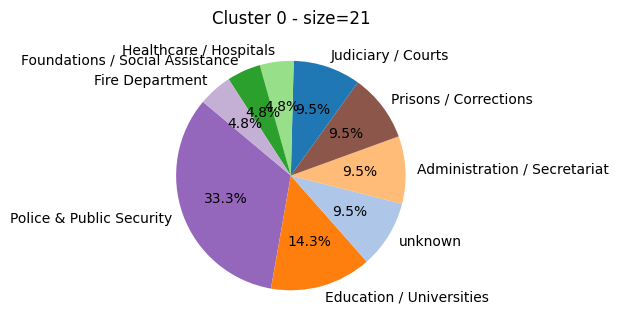

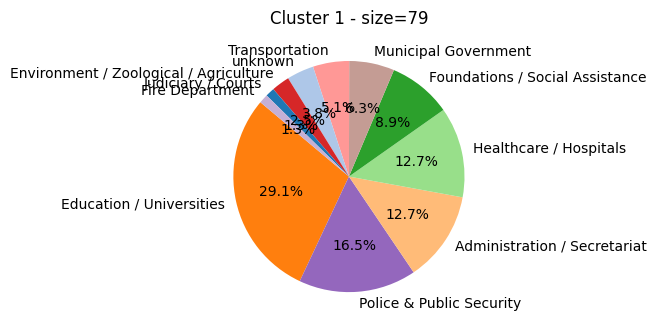

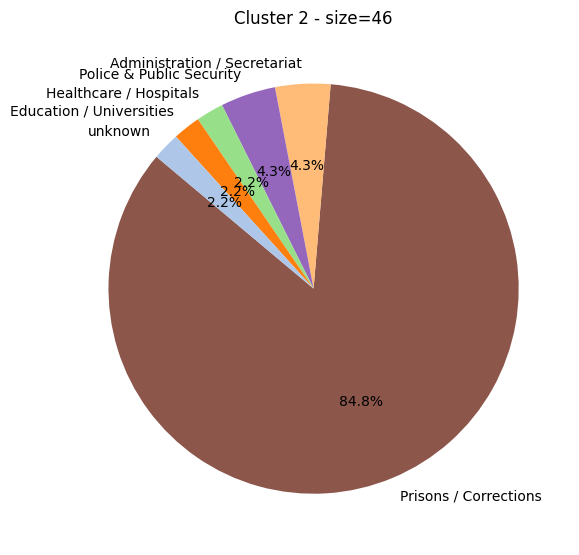

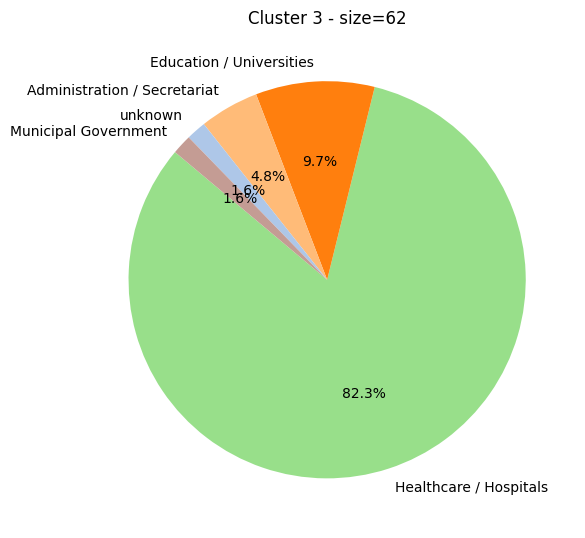

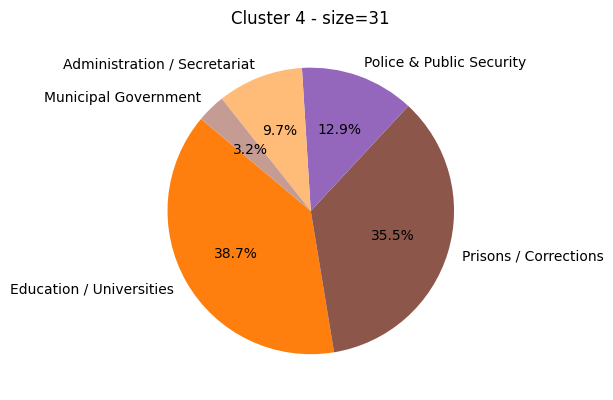

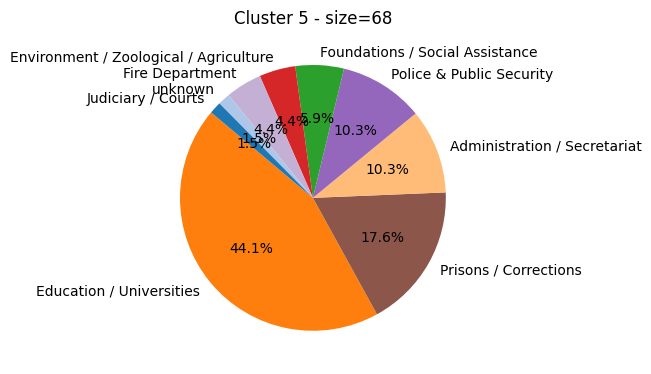

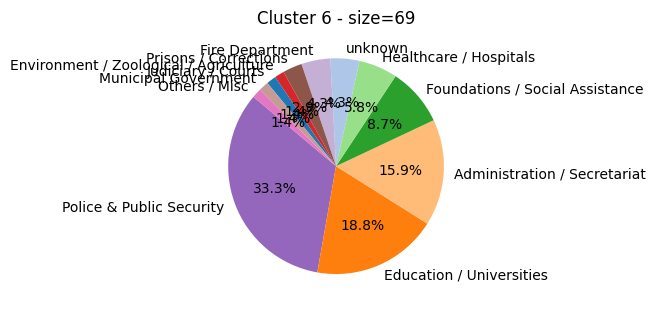

In [69]:
create_pie_charts(deepwalk_embeddings, 128, 7)

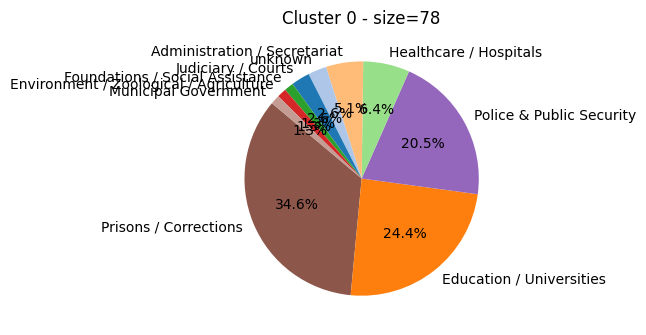

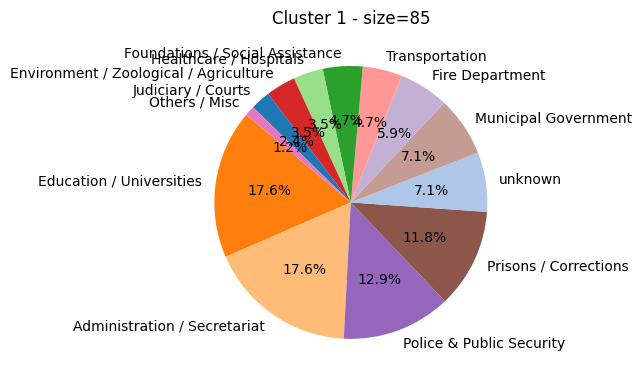

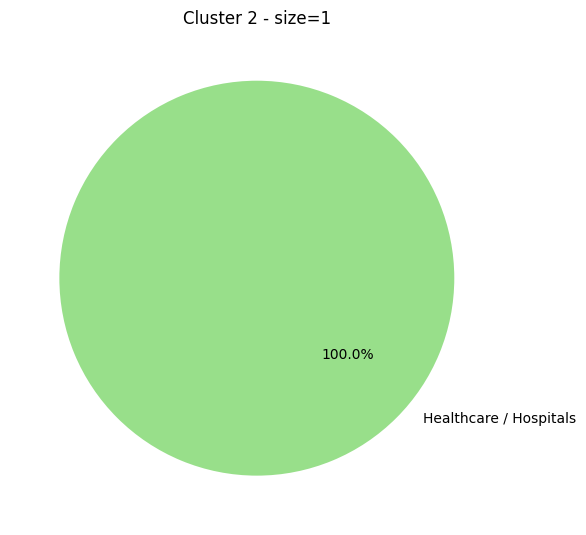

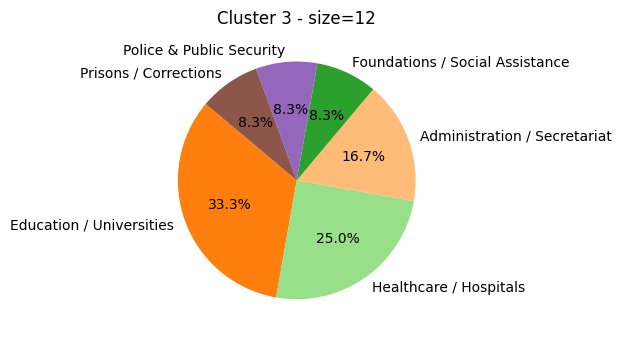

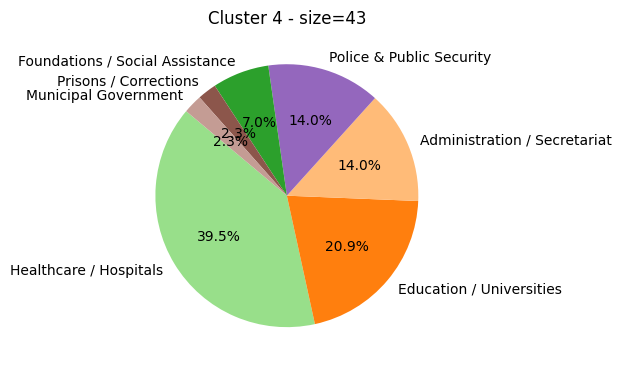

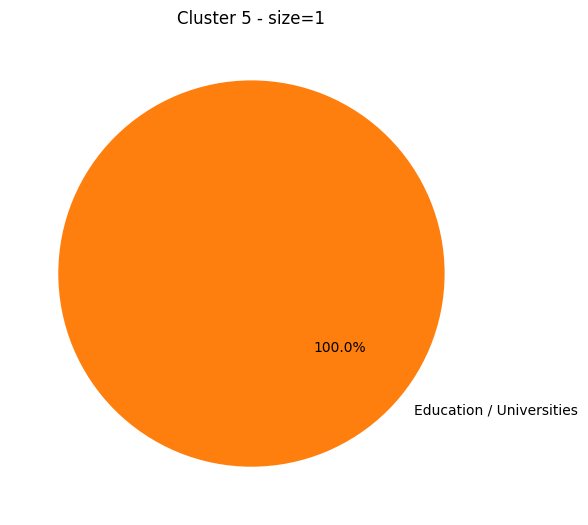

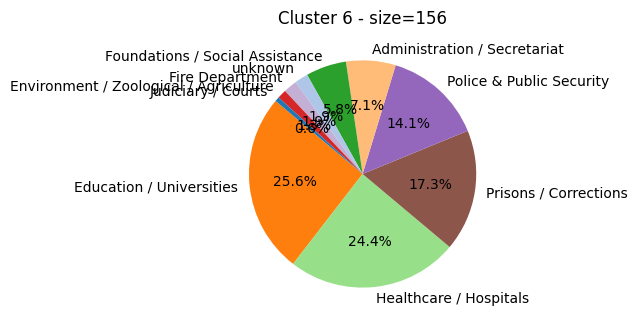

In [70]:
create_pie_charts(LINE_embeddings, 128, 7)

In [81]:
def top_k_nearest_pairs(embeddings, n_embeddings=128, k=10):
    """
    Finds the k nearest distinct pairs of rows in 'embeddings.'
    Returns a list of (i, j, distance) sorted ascending by distance.

    embeddings: (N, d) NumPy array
    metric: "euclidean" or "cosine"
    """
    buyer_index = [i for i in buyer_mapping.index if i in embeddings.index]
    embeddings = embeddings.loc[buyer_index].values[:, :n_embeddings]
    N, d = embeddings.shape
    
    dist_matrix = np.zeros((N, N), dtype=np.float32)

    for i in range(N):
        # Expand embeddings[i] to shape (N, d)
        diff = embeddings - embeddings[i]  # (N, d)
        dist_matrix[i] = np.sqrt(np.sum(diff**2, axis=1).tolist())  # Euclidean
    
    # dist_matrix is symmetrical; distance(i, i) = 0
    # We only want distinct pairs i < j. So we flatten the upper triangle.

    # -- 2) Extract upper triangle of distances. --
    pairs = []
    for i in range(N):
        for j in range(i+1, N):
            pairs.append( (i, j, dist_matrix[i,j]) )

    # -- 3) Sort by distance ascending --
    pairs.sort(key=lambda x: x[2])

    # -- 4) Return top-k --
    return pairs[:k]


[(23, 192, 0.5243117),
 (309, 342, 0.6812233),
 (192, 309, 0.7721048),
 (321, 342, 0.8506069),
 (23, 309, 0.9290154),
 (192, 342, 0.9613496),
 (37, 309, 1.0084941),
 (265, 321, 1.0159594),
 (23, 342, 1.0168),
 (23, 265, 1.0287044)]

In [85]:
uge_translations = pd.read_csv("assets/uge_column_translation.tsv", sep="\t", index_col=0).uge_translation.to_dict()
index_to_uge_translation = {index: uge_translations.get(buyer_mapping.loc[index, "name"], "unknown") for index in buyer_mapping.index}


deepwalk_pairs = top_k_nearest_pairs(deepwalk_embeddings, 128, 10)
for i, j, dist in deepwalk_pairs:
    print(f"{index_to_uge_translation[i]} - {index_to_uge_translation[j]}: {dist:.2f}")

DIR.ENS.-REG.FERNANDOPOLIS - DEPTO.POL.JUD.SP.INTERIOR - DEINTER-4 BAURU: 0.52
PENIT. MARIO M.ALBUQUERQUE - FEMALE PENITENTIAL II OF TREMEMBE: 0.68
DEPTO.POL.JUD.SP.INTERIOR - DEINTER-4 BAURU - PENIT. MARIO M.ALBUQUERQUE: 0.77
CTO.READAP.PEN.DR.JOSE ISMAEL PEDROSA-P.BERN - FEMALE PENITENTIAL II OF TREMEMBE: 0.85
DIR.ENS.-REG.FERNANDOPOLIS - PENIT. MARIO M.ALBUQUERQUE: 0.93
DEPTO.POL.JUD.SP.INTERIOR - DEINTER-4 BAURU - FEMALE PENITENTIAL II OF TREMEMBE: 0.96
DIR.ENS.-REG.TAUBATE - PENIT. MARIO M.ALBUQUERQUE: 1.01
CTO.REG.ADMINIST.DE ARARAQUARA - CTO.READAP.PEN.DR.JOSE ISMAEL PEDROSA-P.BERN: 1.02
DIR.ENS.-REG.FERNANDOPOLIS - FEMALE PENITENTIAL II OF TREMEMBE: 1.02
DIR.ENS.-REG.FERNANDOPOLIS - CTO.REG.ADMINIST.DE ARARAQUARA: 1.03


In [ ]:
LINE_pairs = top_k_nearest_pairs(LINE_embeddings, 128, 10)
for i, j, dist in LINE_pairs:
    print(f"{index_to_uge_translation[i]} - {index_to_uge_translation[j]}: {dist:.2f}")
